# Marketing Spend Effectiveness Analysis (Advance Hypothesis & Regression Analysis)

* This project is in continuation with our earlier jupyter notebook where we had performed statistical analysis. In this notebook, we would be trying to understand what factors influence CPA and how can these inform marketing strategy.
* The goal is to understand which campaign metrics most influence Cost Per Acquisition (CPA). By modeling Log CPA using campaign data, we aim to uncover which individual features are strong predictors of how much it costs to acquire a customer.
* If we can identify a key predictor of CPA, it will help the marketing team make better budget allocation decisions and optimize their campaigns.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv('CleanedMarketingCampaign.csv')

In [3]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,...,Gender,Age_Group,Conversions,Click_Through_Rate,Cost_Per_Click,Cost_Per_Acquisition,Log_CTR,Log_CPA,Z_Log_CPA,Z_Log_CTR
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174.0,6.29,Chicago,...,Men,18-24,20.24,0.263267,31.964427,799.110672,-1.334547,6.683499,0.792484,1.167153
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566.0,5.61,New York,...,Women,35-44,13.92,0.015419,99.706897,830.890805,-4.171482,6.722498,0.832476,-2.245426
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200.0,7.18,Los Angeles,...,Men,25-34,40.88,0.075864,17.465753,249.510763,-2.578683,5.519502,-0.401154,-0.329432
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724.0,5.55,Miami,...,All,All Ages,23.87,0.119231,58.635945,533.054043,-2.126611,6.278623,0.377297,0.214371
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452.0,6.50,Los Angeles,...,Men,25-34,18.95,0.090217,43.408971,868.179420,-2.405431,6.766398,0.877494,-0.121025


In [4]:
df.columns

Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Language', 'Clicks', 'Impressions',
       'Engagement_Score', 'Customer_Segment', 'Date', 'Gender', 'Age_Group',
       'Conversions', 'Click_Through_Rate', 'Cost_Per_Click',
       'Cost_Per_Acquisition', 'Log_CTR', 'Log_CPA', 'Z_Log_CPA', 'Z_Log_CTR'],
      dtype='object')

In [5]:
df[(df['Z_Log_CPA'] > 3) | (df['Z_Log_CPA'] < -3)]

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,...,Gender,Age_Group,Conversions,Click_Through_Rate,Cost_Per_Click,Cost_Per_Acquisition,Log_CTR,Log_CPA,Z_Log_CPA,Z_Log_CTR
93,94,NexGen Systems,Display,Men 25-34,45 days,Instagram,0.01,14438.0,7.19,New York,...,Men,25-34,1.47,0.022626,98.217687,9821.768707,-3.788221,9.192356,3.365228,-1.784398
179,180,Alpha Innovations,Display,Women 35-44,30 days,Google Ads,0.01,16862.0,6.29,Chicago,...,Women,35-44,2.00,0.132188,84.310000,8431.000000,-2.023457,9.039671,3.208654,0.338456
199,200,TechCorp,Influencer,Men 25-34,30 days,Google Ads,0.02,16312.0,2.63,Chicago,...,Men,25-34,2.34,0.026555,139.418803,6970.940171,-3.628172,8.849505,3.013646,-1.591873
475,476,Innovate Industries,Search,Women 35-44,45 days,YouTube,0.02,17467.0,5.48,Houston,...,Women,35-44,2.40,0.014076,145.558333,7277.916667,-4.262556,8.892600,3.057838,-2.354981
957,958,Innovate Industries,Influencer,Men 18-24,30 days,Email,0.01,17455.0,6.33,Los Angeles,...,Men,18-24,2.35,0.024112,74.276596,7427.659574,-3.724612,8.912966,3.078723,-1.707882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199524,199525,Alpha Innovations,Display,All Ages,30 days,Instagram,0.01,18914.0,6.13,Los Angeles,...,All,All Ages,1.80,0.058670,105.077778,10507.777778,-2.835654,9.259871,3.434461,-0.638545
199604,199605,DataTech Solutions,Display,Men 18-24,45 days,Google Ads,0.01,15694.0,4.96,Chicago,...,Men,18-24,1.59,0.031006,98.704403,9870.440252,-3.473244,9.197300,3.370297,-1.405509
199788,199789,DataTech Solutions,Display,Men 18-24,30 days,Email,0.01,18588.0,5.89,Houston,...,Men,18-24,2.15,0.023111,86.455814,8645.581395,-3.767022,9.064804,3.234427,-1.758897
199886,199887,NexGen Systems,Display,Men 25-34,60 days,Website,0.01,11153.0,4.38,New York,...,Men,25-34,1.49,0.026741,74.852349,7485.234899,-3.621189,8.920688,3.086641,-1.583473


### Insights:
* The presence of outliers can skew the regression line and reduce the model accuracy. So, we can filter the dataset without outliers to get clean regression results.

In [6]:
df_new = df[(df['Z_Log_CPA'] > -3) & (df['Z_Log_CPA'] < 3)]

In [7]:
df_new

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,...,Gender,Age_Group,Conversions,Click_Through_Rate,Cost_Per_Click,Cost_Per_Acquisition,Log_CTR,Log_CPA,Z_Log_CPA,Z_Log_CTR
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174.0,6.29,Chicago,...,Men,18-24,20.24,0.263267,31.964427,799.110672,-1.334547,6.683499,0.792484,1.167153
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566.0,5.61,New York,...,Women,35-44,13.92,0.015419,99.706897,830.890805,-4.171482,6.722498,0.832476,-2.245426
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200.0,7.18,Los Angeles,...,Men,25-34,40.88,0.075864,17.465753,249.510763,-2.578683,5.519502,-0.401154,-0.329432
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724.0,5.55,Miami,...,All,All Ages,23.87,0.119231,58.635945,533.054043,-2.126611,6.278623,0.377297,0.214371
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452.0,6.50,Los Angeles,...,Men,25-34,18.95,0.090217,43.408971,868.179420,-2.405431,6.766398,0.877494,-0.121025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,TechCorp,Display,All Ages,30 days,Google Ads,0.06,18365.0,2.84,Chicago,...,All,All Ages,51.48,0.143287,21.404429,356.740482,-1.942839,5.877009,-0.034544,0.435432
199996,199997,DataTech Solutions,Email,Men 25-34,15 days,Facebook,0.02,8168.0,4.14,Chicago,...,Men,25-34,4.56,0.074316,35.824561,1791.228070,-2.599301,7.490657,1.620195,-0.354233
199997,199998,DataTech Solutions,Social Media,Men 18-24,45 days,Website,0.05,13397.0,3.25,New York,...,Men,18-24,36.15,0.075723,18.529737,370.594744,-2.580546,5.915109,0.004527,-0.331672
199998,199999,Innovate Industries,Influencer,All Ages,30 days,YouTube,0.10,18508.0,3.86,Houston,...,All,All Ages,52.80,0.191097,35.053030,350.530303,-1.654924,5.859447,-0.052553,0.781768


### Model Building

* For model building, let's analyze which variable holds the strongest linear relationship with CPA. As per the dataset, we are selecting four variables - Clicks, Impressions, Conversions and Engagement Score as independent variables. We need to plot the graph to understand the relationship between CPA and each of the independent variables.

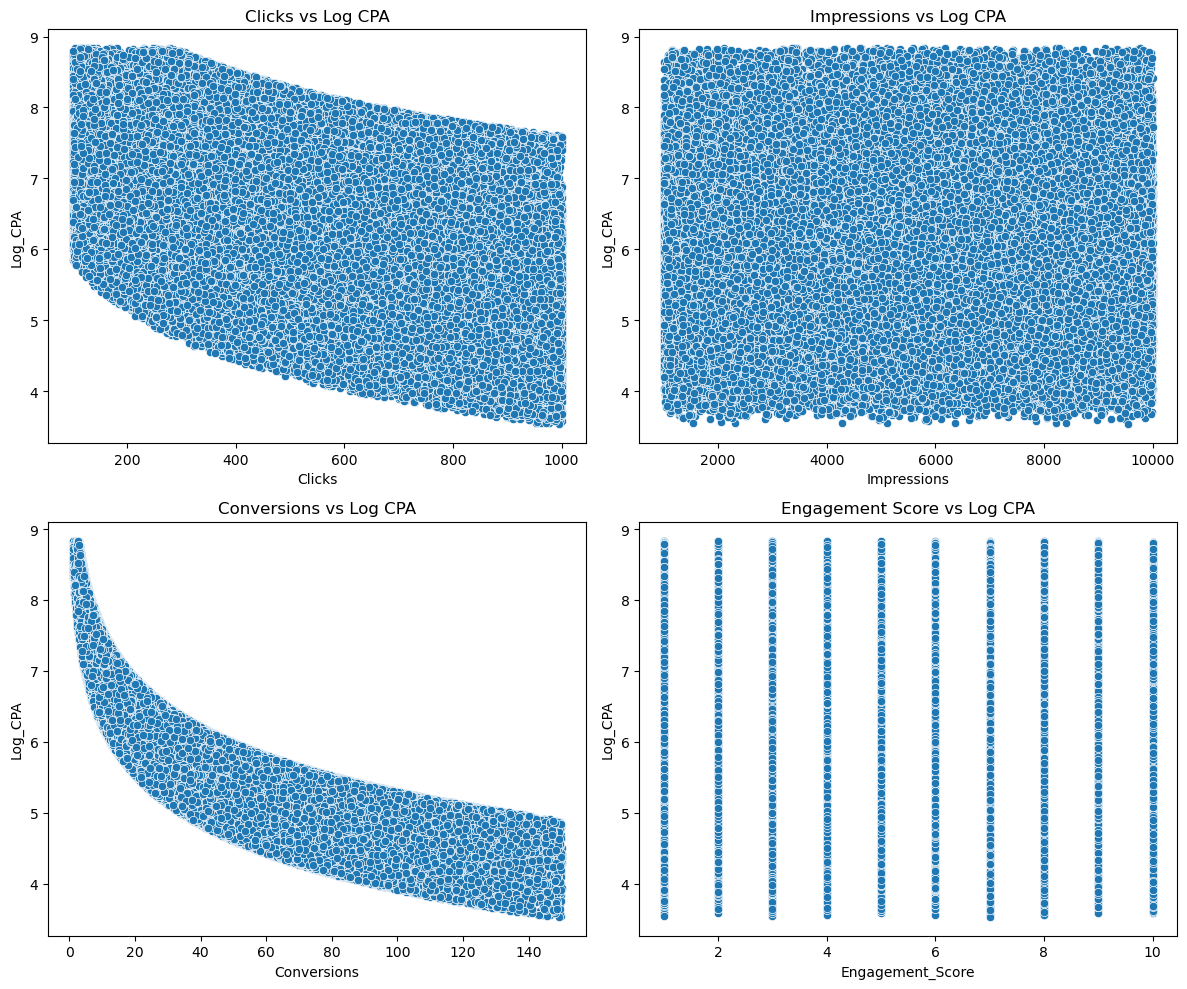

In [10]:
# plotting scatter plot
fig, axs = plot.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(x='Clicks', y='Log_CPA', data=df_new, ax=axs[0, 0])
axs[0, 0].set_title('Clicks vs Log CPA')

sns.scatterplot(x='Impressions', y='Log_CPA', data=df_new, ax=axs[0, 1])
axs[0, 1].set_title('Impressions vs Log CPA')

sns.scatterplot(x='Conversions', y='Log_CPA', data=df_new, ax=axs[1, 0])
axs[1, 0].set_title('Conversions vs Log CPA')

sns.scatterplot(x='Engagement_Score', y='Log_CPA', data=df_new, ax=axs[1, 1])
axs[1, 1].set_title('Engagement Score vs Log CPA')

plot.tight_layout()
plot.show()

In [12]:
correlation_matrix = df_new.corr(numeric_only=True)
log_cpa_corr = correlation_matrix['Log_CPA'].sort_values(ascending=False)
print(log_cpa_corr)

Z_Log_CPA               1.000000
Log_CPA                 1.000000
Cost_Per_Acquisition    0.829037
Cost_Per_Click          0.641110
Acquisition_Cost        0.383892
ROI                     0.002814
Impressions             0.001608
Engagement_Score       -0.000086
Campaign_ID            -0.001742
Click_Through_Rate     -0.291885
Log_CTR                -0.420512
Z_Log_CTR              -0.420512
Clicks                 -0.576944
Log_Clicks             -0.594797
Conversion_Rate        -0.652613
Conversions            -0.833203
Name: Log_CPA, dtype: float64


### Insights:
* As we can observe from the plots and correlation matrix that Conversion has the strongest negative correlation with Log CPA amongst all the numeric variables.
* This means that as the number of conversions increases, the Log-transformed Cost Per Acquisition (CPA) tends to decrease,which aligns with typical marketing logic: better campaign performance (more conversions) often leads to a lower cost per acquisition.
* Even though the correlation is negative, it's still a linear relationship, and linear regression can help us: quantify the impact of Conversions on Log_CPA, predict Log CPA based on conversion numbers and understand how campaign performance metrics relate to cost efficiency.

### Build & fit the model

In [14]:
# Defining the OLS formula
ols_formula = 'Log_CPA ~ Conversions'

# Creating an OLS model
OLS = ols(formula = ols_formula, data = df_new)

# Fitting the model
model = OLS.fit()

model_results = model.summary()

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Log_CPA   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                 4.522e+05
Date:                Mon, 21 Jul 2025   Prob (F-statistic):               0.00
Time:                        15:04:12   Log-Likelihood:            -1.5547e+05
No. Observations:              199190   AIC:                         3.109e+05
Df Residuals:                  199188   BIC:                         3.110e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.9874      0.002   3482.119      0.000       6.984       6.991
Conversions    -0.0247   3.67e-05   -672.485      0.000      -0.025      -0.025
==============================================================================
Omnibus:                     4029.025   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4344.051
Skew:                           0.338   Prob(JB):                         0.00
Kurtosis:                       3.258   Cond. No.                         92.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking Model Assumptions

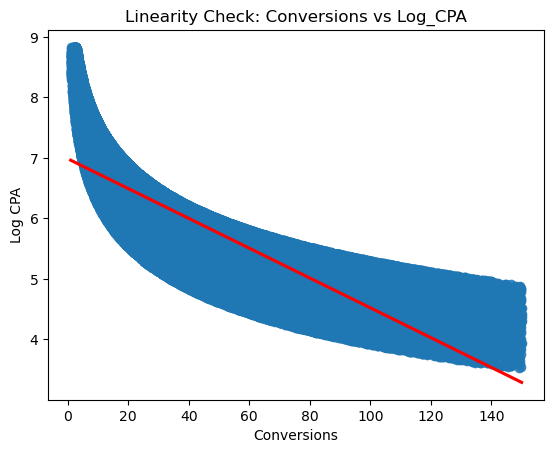

In [15]:
# Checking for linearity

sns.regplot(x='Conversions', y='Log_CPA', data=df_new, line_kws={'color': 'red'})
plot.title('Linearity Check: Conversions vs Log_CPA')
plot.xlabel('Conversions')
plot.ylabel('Log CPA')
plot.show()

### Insights:
* There is a clear inverse linear relationship between Conversions and Log_CPA, as observed in the scatter plot with the regression line. This satisfies the linearity assumption of simple linear regression, although the relationship is negative (i.e., as conversions increase, Log CPA tends to decrease).

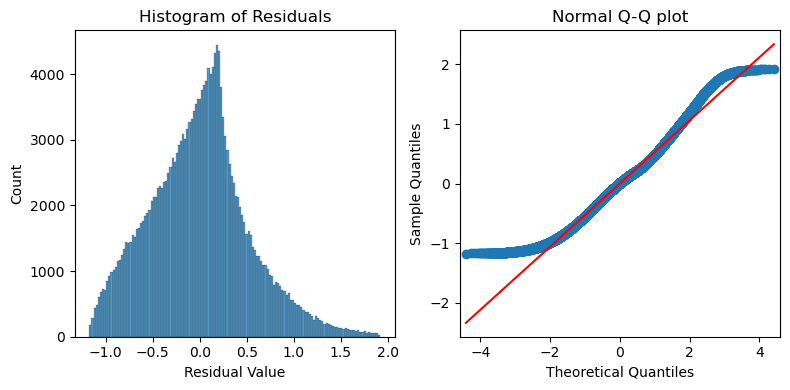

In [17]:
# Checking for normality

residuals = model.resid

fig, axes = plot.subplots(1, 2, figsize = (8,4))

# Creating histogram plots
sns.histplot(residuals, ax=axes[0])
axes[0].set_title('Histogram of Residuals')
axes[0].set_xlabel('Residual Value')

# Creating Q-Q plot for residuals
sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_title('Normal Q-Q plot')

plot.tight_layout()

### Insights:
* The histogram of residuals appears to be moderately skewed to the right, deviating from the ideal bell-shaped curve expected under normality.
* The Q-Q plot shows that while the central residuals follow the red reference line fairly well, the tails deviate noticeably — particularly at both extremes — indicating non-normality in the distribution.
* The residuals show some deviation from normality, especially in the tails. While slight deviations can be acceptable in large samples, this suggests that the normality assumption is partially violated. It may not severely impact the validity of the regression due to the large sample size (Central Limit Theorem), but caution is advised when interpreting p-values.

In [19]:
# Checking for Independence of Observation
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)
print("Durbin-Watson statistic:", dw_stat)

Durbin-Watson statistic: 2.006590729553114


### Insights:
* Since, DW is 2, it means there is no autocorrelation. Each observation is independent.

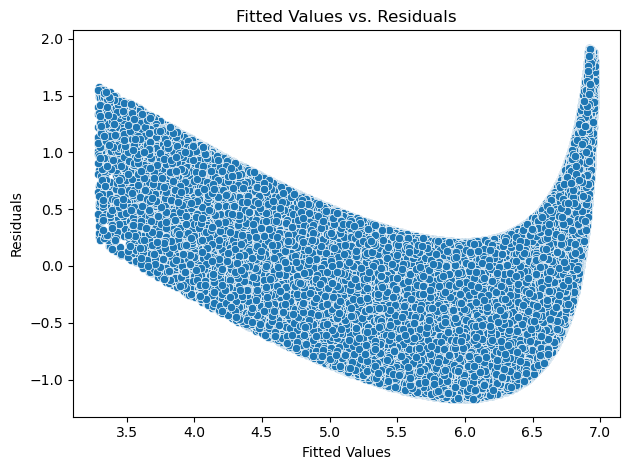

In [20]:
# Checking for Homoscedasticity

sns.scatterplot(x = model.fittedvalues, y = model.resid)
plot.title('Fitted Values vs. Residuals')
plot.xlabel('Fitted Values')
plot.ylabel('Residuals')
plot.tight_layout()

### Insights:
* The homoscedasticity assumption is clearly violated. This indicates that the model errors do not have constant variance, which can lead to inefficient estimates and unreliable inference (p-values, confidence intervals).

In [21]:
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Log_CPA   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                 4.522e+05
Date:                Mon, 21 Jul 2025   Prob (F-statistic):               0.00
Time:                        15:04:12   Log-Likelihood:            -1.5547e+05
No. Observations:              199190   AIC:                         3.109e+05
Df Residuals:                  199188   BIC:                         3.110e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.9874      0.002   3482.119      0.000       6.984       6.991
Conversions    -0.0247   3.67e-05   -672.485      0.000      -0.025      -0.025
==============================================================================
Omnibus:                     4029.025   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4344.051
Skew:                           0.338   Prob(JB):                         0.00
Kurtosis:                       3.258   Cond. No.                         92.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Insights:
* Using `Conversions` as X results in a simple linear regression model  with R square = 0.69. In other words, conversions explains 69.4% of variance in `Log CPA`.
* When `Conversions` is used as the independent variable X, the coefficient for the Intercept is 6.98 and the coefficient for `Conversions` is -0.024.
* So, the relationship between `Log CPA` and `Conversions` in the form of Linear equation can be written as:
  Log_CPA = 6.98 + (-0.024)*Conversions
* According to the model, when `Conversions` is used as an independent variable X, one unit increase in `Conversions` can result in an decrease of 0.024 in `Log CPA`.

### Summary:
* A strong negative linear relationship was observed between Conversions and Log CPA.
* The regression equation was found to be: Log_CPA = 6.98 + (-0.024)*Conversions
* The model yielded an R² value of 0.694, indicating that Conversions alone explains approximately 69.4% of the variance in Log CPA.
* The Durbin-Watson statistic was ~2, suggesting that the residuals are independent and there is no autocorrelation.
* Normality assumption was violated, as the residuals deviate from a normal distribution (as seen in the histogram and Q-Q plot).
* Homoscedasticity was also violated, with a clear U-shaped pattern in the residuals vs. fitted values plot, indicating heteroscedasticity.
* Although Conversions is a strong predictor of Log CPA, the model violates key assumptions, specifically normality and homoscedasticity. To improve model accuracy and reliability, we now move to Multiple Linear Regression, incorporating additional variables to account for more variance and potentially correct the assumption violations.



### Multi Linear Regression 
* Build a model to predict Log CPA using multiple independent variables to improve performance and potentially fix violations (normality, homoscedasticity) seen in the simple linear model.
* We will use Conversions, Cost_Per_Click, Conversion_Rate and Log_Clicks as the independent variables.

In [22]:
# Checking for mulitcollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_new[['Conversions', 'Cost_Per_Click', 'Conversion_Rate', 'Log_Clicks']]

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] 

df_vif = pd.DataFrame(vif, index=X.columns, columns=['VIF'])

df_vif

,VIF
Conversions,10.571282
Cost_Per_Click,3.954997
Conversion_Rate,12.882516
Log_Clicks,6.636965


### Insights:
* VIF > 10 is a red flag
* Including both Conversions and Conversion_Rate is likely problematic — they’re highly correlated with each other.
* Including both Conversions and Log_Clicks also adds moderate multicollinearity.
* Let’s simplify the model to avoid multicollinearity by dropping either Conversions or Conversion_Rate.

In [24]:
ols_formula = 'Log_CPA ~ Cost_Per_Click + Conversion_Rate + Log_Clicks'
model = ols(formula=ols_formula, data=df_new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Log_CPA   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                 4.424e+05
Date:                Mon, 21 Jul 2025   Prob (F-statistic):               0.00
Time:                        16:10:48   Log-Likelihood:                -70673.
No. Observations:              199190   AIC:                         1.414e+05
Df Residuals:                  199186   BIC:                         1.414e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.6356      0.016    550.280      0.000       8.605       8.666
Cost_Per_Click      0.0177   5.11e-05    346.460      0.000       0.018       0.018
Conversion_Rate   -15.7372      0.019   -823.162      0.000     -15.775     -15.700
Log_Clicks         -0.3300      0.002   -142.754      0.000      -0.334      -0.325
==============================================================================
Omnibus:                     3188.819   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6222.455
Skew:                          -0.050   Prob(JB):                         0.00
Kurtosis:                       3.860   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking Model Assumptions

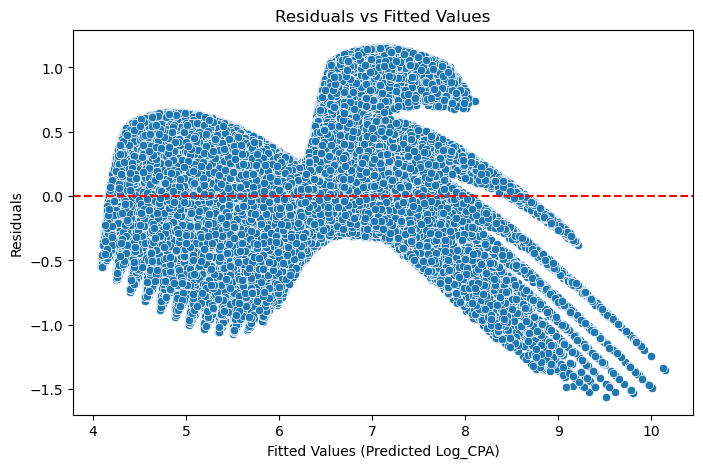

In [26]:
# Checking for linearity
# Predicted values and residuals
y_pred = model.fittedvalues
residuals = model.resid

plot.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plot.axhline(0, color='red', linestyle='--')
plot.title("Residuals vs Fitted Values")
plot.xlabel("Fitted Values (Predicted Log_CPA)")
plot.ylabel("Residuals")
plot.show()

### Insights:
* The residuals are not randomly scattered around the red horizontal line at zero.
* There's a clear and complex pattern, indicating non-linear relationships or interactions among predictors that the linear model is failing to capture.
* This plot violates the linearity assumption.

Text(0.5, 1.0, 'Q-Q Plot of Residuals')

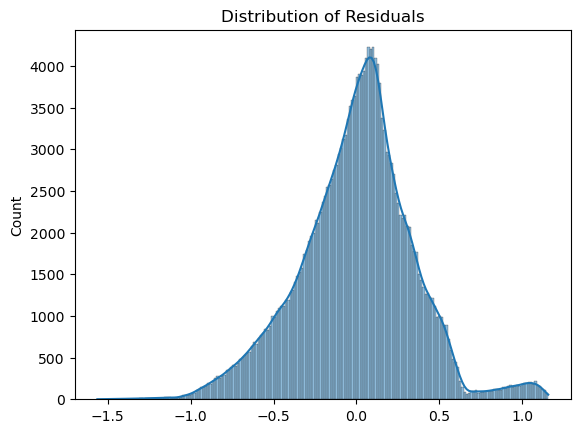

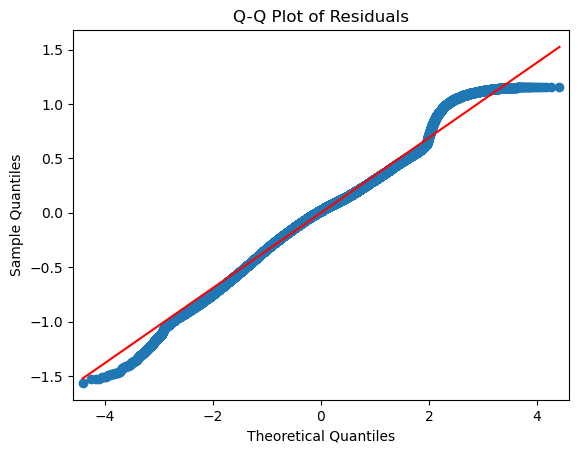

In [33]:
# Checking for linearity
sns.histplot(residuals, kde=True)
plot.title("Distribution of Residuals")

sm.qqplot(residuals, line="s")
plot.title("Q-Q Plot of Residuals")


### Insights:
* Residuals are approximately normally distributed which meets our normality assumption.

Text(0, 0.5, 'Residuals')

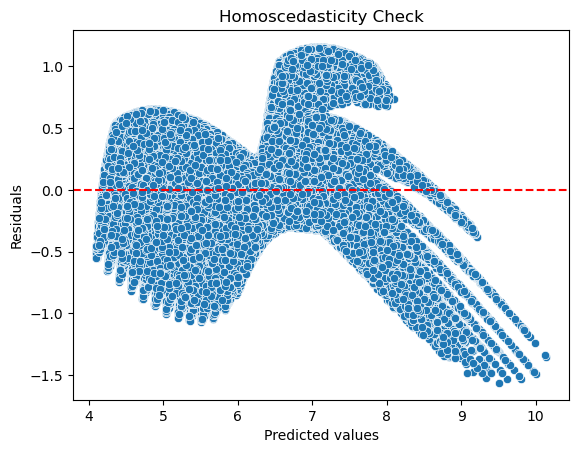

In [34]:
# Checking for homoscedasticity

sns.scatterplot(x=y_pred, y=residuals)
plot.axhline(0, color='red', linestyle='--')
plot.title("Homoscedasticity Check")
plot.xlabel("Predicted values")
plot.ylabel("Residuals")

### Insights:
* Homoscedasticity is not being here as the variance is constant.

In [35]:
# Checking for Independence of Observation
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)
print("Durbin-Watson statistic:", dw_stat)

Durbin-Watson statistic: 2.002343057297637


### Insights:
* Since, DW is 2, it means there is no autocorrelation. Each observation is independent.

In [36]:
# Checking for mulitcollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_new[['Cost_Per_Click', 'Conversion_Rate', 'Log_Clicks']]

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] 

df_vif = pd.DataFrame(vif, index=X.columns, columns=['VIF'])

df_vif

,VIF
Cost_Per_Click,2.112206
Conversion_Rate,4.909257
Log_Clicks,5.227476


### Insights:
* All VIFs are under 5.5, which is generally acceptable in practice.
* Multicollinearity is not a major concern anymore.
* The redundancy caused by Conversions has been adressed here which earlier had a VIF > 10.

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Log_CPA   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                 4.424e+05
Date:                Mon, 21 Jul 2025   Prob (F-statistic):               0.00
Time:                        16:33:30   Log-Likelihood:                -70673.
No. Observations:              199190   AIC:                         1.414e+05
Df Residuals:                  199186   BIC:                         1.414e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.6356      0.016    550.280      0.000       8.605       8.666
Cost_Per_Click      0.0177   5.11e-05    346.460      0.000       0.018       0.018
Conversion_Rate   -15.7372      0.019   -823.162      0.000     -15.775     -15.700
Log_Clicks         -0.3300      0.002   -142.754      0.000      -0.334      -0.325
==============================================================================
Omnibus:                     3188.819   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6222.455
Skew:                          -0.050   Prob(JB):                         0.00
Kurtosis:                       3.860   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Insights:
* When `Cost_Per_Click`, `Conversion_Rate` and `Log_Clicks` are used as independent variables X, the R-square appears to be 0.869. This means 86.9% of variance in `Log_CPA` is explained by `Cost_Per_Click`, `Conversion_Rate` and `Log_Clicks` indicating a strong fit.
* p-value for all coefficients are zero which means all coefficients are statistically significant.
* Regression Equation:
  `Log_CPA` = 8.63 + 0.017*`Cost_Per_Click` - 15.73*`Conversion_Rate` - 0.33*`Log_Clicks`
* For every unit increase in CPC, Log_CPA increases slightly by 0.0177 units, holding other variables constant.
* A strong inverse relationship; higher conversion rate substantially reduces Log CPA.
* As number of clicks increases (log-transformed), Log CPA decreases slightly.

### Conclusion:
* This multiple linear regression model is a strong predictor of Log CPA, explaining nearly 87% of its variance using just three independent variables. While the model performs well overall, a few assumption violations, notably non-linearity and heteroscedasticity suggest that:
  1. Further improvement could come from non-linear modeling techniques, adding interaction terms, or applying transformations.
* Despite these limitations, the model provides actionable insights for marketing budget allocation and performance optimization.